In [24]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
#reading csv
df = pd.read_csv("home_value_calc.csv")
#df = pd.read_csv("census_data.csv")
df.head()

,Population,Median Age,Household Income,median_home_value,Poverty Rate,Unemployment rate,house_count
0,17423.0,45.0,56714.0,202800.0,8.391207,2.749240,213900
1,29970.0,23.2,48923.0,344000.0,27.864531,4.240908,333400
2,5228.0,44.1,70568.0,213700.0,4.399388,2.926549,231500
3,14888.0,42.5,80502.0,258000.0,9.470715,3.647233,278400
4,1194.0,48.5,67250.0,235000.0,4.103853,5.276382,227600


In [26]:
#dropping zipcode - will need to do join when we get more data
    #new data file dropped zip already
#df = df.drop("Zipcode",axis=1)
df.describe()

,Population,Median Age,Household Income,median_home_value,Poverty Rate,Unemployment rate,house_count
count,15563.000000,1.556300e+04,1.556300e+04,1.556300e+04,15563.000000,15563.000000,1.556300e+04
mean,17464.464563,-8.563245e+04,-4.522467e+05,-1.984790e+05,12.648011,3.369888,2.752745e+05
std,16508.149140,7.557239e+06,1.850716e+07,1.690099e+07,7.616785,1.516426,2.716065e+05
min,15.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,2.190000e+04
25%,4269.000000,3.630000e+01,4.517550e+04,1.210000e+05,6.823855,2.341638,1.355000e+05
50%,11947.000000,4.070000e+01,5.589300e+04,1.709000e+05,11.155877,3.183341,2.001000e+05
75%,26557.500000,4.460000e+01,7.229400e+04,2.699000e+05,16.897205,4.186067,3.153500e+05
max,115104.000000,7.550000e+01,2.500010e+05,2.000001e+06,71.000000,25.198098,6.613200e+06


In [27]:
print("minimum stats")
print("-------")
print(df.min())
print("-------")
print("maximum stats")
print("-------")
print(df.max())

minimum stats
-------
Population                  15.0
Median Age          -666666666.0
Household Income    -666666666.0
median_home_value   -666666666.0
Poverty Rate                 0.0
Unemployment rate            0.0
house_count              21900.0
dtype: float64
-------
maximum stats
-------
Population           1.151040e+05
Median Age           7.550000e+01
Household Income     2.500010e+05
median_home_value    2.000001e+06
Poverty Rate         7.100000e+01
Unemployment rate    2.519810e+01
house_count          6.613200e+06
dtype: float64


In [28]:
#drops zeros
df.dropna()
df.describe()

,Population,Median Age,Household Income,median_home_value,Poverty Rate,Unemployment rate,house_count
count,15563.000000,1.556300e+04,1.556300e+04,1.556300e+04,15563.000000,15563.000000,1.556300e+04
mean,17464.464563,-8.563245e+04,-4.522467e+05,-1.984790e+05,12.648011,3.369888,2.752745e+05
std,16508.149140,7.557239e+06,1.850716e+07,1.690099e+07,7.616785,1.516426,2.716065e+05
min,15.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,2.190000e+04
25%,4269.000000,3.630000e+01,4.517550e+04,1.210000e+05,6.823855,2.341638,1.355000e+05
50%,11947.000000,4.070000e+01,5.589300e+04,1.709000e+05,11.155877,3.183341,2.001000e+05
75%,26557.500000,4.460000e+01,7.229400e+04,2.699000e+05,16.897205,4.186067,3.153500e+05
max,115104.000000,7.550000e+01,2.500010e+05,2.000001e+06,71.000000,25.198098,6.613200e+06


In [29]:
#drops any negative values because they're more then likely errors
df = df.loc[(df>0).all(axis=1)] 
df.describe()

,Population,Median Age,Household Income,median_home_value,Poverty Rate,Unemployment rate,house_count
count,15482.000000,15482.000000,15482.000000,1.548200e+04,15482.000000,15482.000000,1.548200e+04
mean,17549.016600,40.784815,61797.342333,2.294391e+05,12.661956,3.381465,2.741827e+05
std,16509.474385,6.738637,24591.887721,1.841031e+05,7.585542,1.497233,2.684543e+05
min,84.000000,19.000000,12493.000000,3.350000e+04,0.072780,0.054230,2.190000e+04
25%,4347.500000,36.300000,45181.750000,1.209000e+05,6.844980,2.351702,1.354000e+05
50%,12065.500000,40.700000,55857.000000,1.707000e+05,11.167109,3.188249,1.995500e+05
75%,26695.750000,44.600000,72256.750000,2.691000e+05,16.902552,4.189528,3.144750e+05
max,115104.000000,75.500000,250001.000000,2.000001e+06,60.944206,25.198098,6.613200e+06


In [30]:
#segment out my Y-target and X's-data
target = df['median_home_value']
data = df.drop('median_home_value', axis = 1)
print(data.shape, target.shape)

(15482, 6) (15482,)


In [31]:
#importing test train and scaling data down
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
target = target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [32]:
#creating a decision tree model  and testing it
from sklearn.tree import DecisionTreeRegressor
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train_scaled, y_train_scaled)
clf.score(X_test_scaled, y_test_scaled)

0.891471639576922

In [37]:
#importing a random forest regression model and testing it
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_test_scaled, y_test_scaled)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.936503357732517

In [38]:
importances = rf.feature_importances_
importances

array([0.00866878, 0.01019037, 0.02275516, 0.0076649 , 0.0074321 ,
       0.94328868])

In [41]:
sorted(zip(rf.feature_importances_, data.keys()), reverse=True)

[(0.9432886846428303, 'house_count'),
 (0.022755159594424604, 'Household Income'),
 (0.010190371559032674, 'Median Age'),
 (0.008668783673749202, 'Population'),
 (0.007664900415528476, 'Poverty Rate'),
 (0.007432100114434813, 'Unemployment rate')]

In [ ]:
#ignore for now- need to look into nn regression
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=6))
#model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2000002, activation='softmax'))

In [ ]:
#also ignore  still doing research
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

In [34]:
#importing a linear regression model and fitting it
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#looking at mse and r2 scores for the linear regression model - ignore MSE 
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0642025425082268, R2: 0.9319738906307522


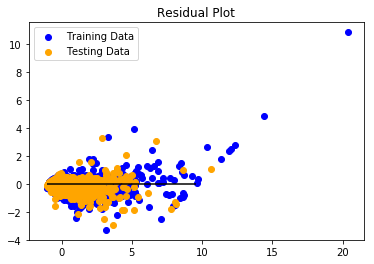

In [36]:
#still unsure how to uderstand this pls ignore
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()